Linear Regression - Student Admission Prediction

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Preprocessing

In [5]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.isnull().any()
# df.isna().sum()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [8]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.drop('Serial No.', axis='columns', inplace=True)
df

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
X = df.drop('Probability', axis='columns')
Y = df['Probability']
print("X features: \n",X.head())
print("Y: \n",Y.head())

X features: 
    GRE  TOEFL  University Rating  SOP  LOR  CGPA  Research
0  337    118                  4  4.5  4.5  9.65         1
1  324    107                  4  4.0  4.5  8.87         1
2  316    104                  3  3.0  3.5  8.00         1
3  322    110                  3  3.5  2.5  8.67         1
4  314    103                  2  2.0  3.0  8.21         0
Y: 
 0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Probability, dtype: float64


Model Development

In [10]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

400 100


In [11]:
#linear regression model building
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
residuals = Y_test - y_pred

Check R square value and Adjusted R square

In [13]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print(f'R2 Score: {r2}')

n = len(Y_test)
num_col = df.shape[1]
k = num_col -1

adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Adjusted R-squared: {adjusted_r_squared}')

R2 Score: 0.8214787365889663
Adjusted R-squared: 0.8078955969816051


Checking Assumptions

<Axes: xlabel='Probability'>

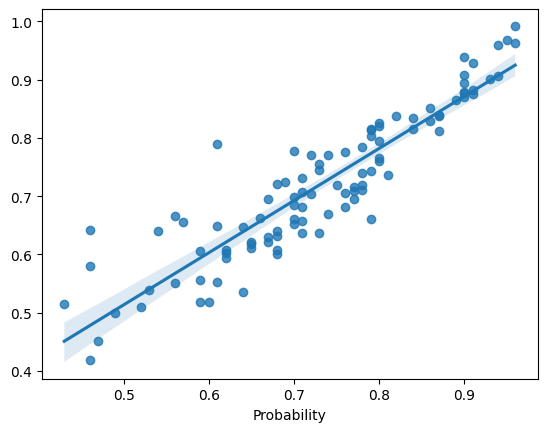

In [14]:
# Linearity
sns.regplot(x = Y_test, y = y_pred,)
# sns.pairplot(data = df, x_vars = X, y_vars = Y, kind = 'scatter', height = 4)

<Axes: ylabel='Probability'>

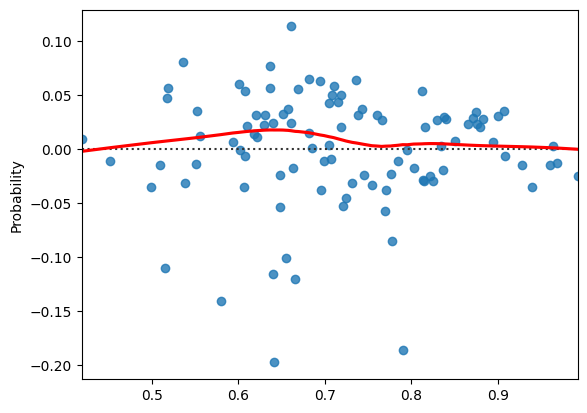

In [15]:
# Homoscedasticity
sns.residplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color': 'red'})

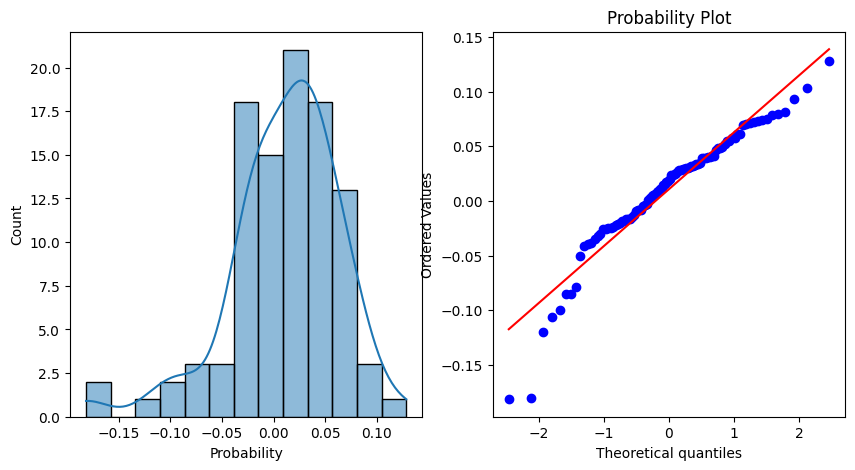


Stats: 0.594, Sig.: 0.000


In [16]:
# Normality
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# Using Histogram
sns.histplot(data = residuals, kde = True, ax = axes[0])
# Using Q-Q plot
stats.probplot(x = residuals, dist = 'norm', plot = plt)
plt.show()

# Shapiro-Wilk Test
stats, p_value = stats.shapiro(X)
print(f'\nStats: {stats:.3f}, Sig.: {p_value:.3f}')

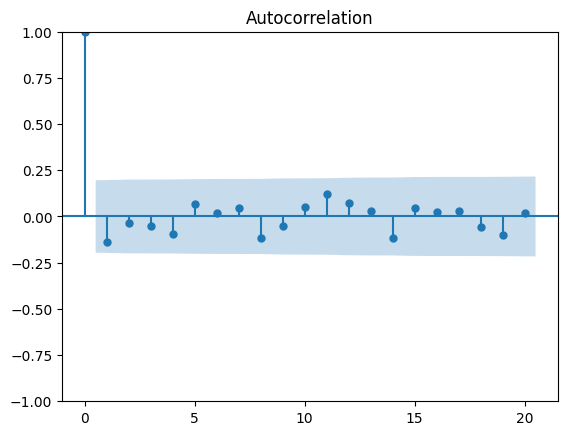

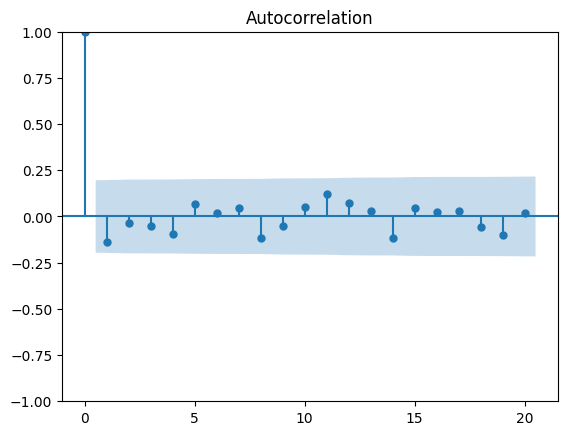

In [17]:
# Auto-correlation / Independence
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, )

<Axes: >

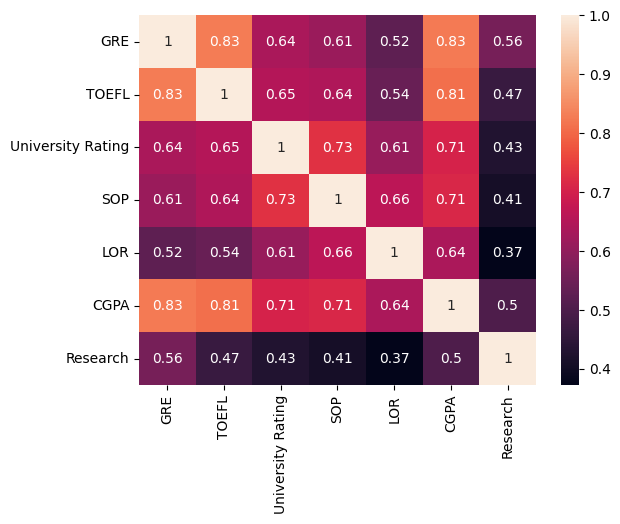

In [18]:
# Multi-Colinearity
corr = X.corr(method = 'pearson')
sns.heatmap(corr, annot = True)

In [21]:
# Get input from the user
gre_score = float(input("Enter GRE score: "))
toefl_score = float(input("Enter TOEFL score: "))
university_rating = int(input("Enter University Rating: "))
sop = float(input("Enter SOP score: "))
lor = float(input("Enter LOR  score: "))
cgpa = float(input("Enter CGPA: "))
research = int(input("Enter 1 if the candidate has research experience, 0 otherwise: "))

input_data = [[gre_score, toefl_score, university_rating, sop, lor, cgpa, research]]
probability = model.predict(input_data)[0] * 100

print('Probability of getting into college is {}%'.format(round(probability, 3)))


Enter GRE score:  300
Enter TOEFL score:  100
Enter University Rating:  5
Enter SOP score:  4.9
Enter LOR  score:  4.5
Enter CGPA:  8.5
Enter 1 if the candidate has research experience, 0 otherwise:  0


Probability of getting into college is 67.762%
